# **Cars 4 You | Machine Learning Project**

### **Import Libraries**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from rapidfuzz import process, fuzz


### **Import Data**

In [53]:
df = pd.read_csv('../data/train.csv')

In [54]:
df_models = pd.read_csv('../data/car_models.csv')

---

### **Data Understanding**

In [55]:
df.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [56]:
df.describe(include='all')

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74452,74456,74482.000000,75973.000000,74451,74510.000000,74462,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
unique,NaN,72,735,NaN,NaN,40,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Focus,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14808,6353,NaN,NaN,38050,NaN,37995,NaN,NaN,NaN,NaN,NaN,NaN
mean,37986.000000,NaN,NaN,2017.096611,16881.889553,NaN,23004.184088,NaN,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,NaN,NaN,2.208704,9736.926322,NaN,22129.788366,NaN,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,NaN,NaN,1970.000000,450.000000,NaN,-58540.574478,NaN,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,NaN,NaN,2016.000000,10200.000000,NaN,7423.250000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,NaN,NaN,2017.000000,14699.000000,NaN,17300.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,NaN,NaN,2019.000000,20950.000000,NaN,32427.500000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


#### **Data Quality**
- **Price**: we have outliers, since we have a really big jump from the 4th Quartile and the Max value and we have a slightly left skewed distribution
- **Mileage**: we have outliers, since we have a really big jump from the 4th Quartile and the Max value and we have a left skewed distribution, we also have negative values, so we need to handle these values
- **Tax**: we have negative values, we need to investigate why these values are negative and If they make any sense in this context
- **MPG**: We have negative values, we need to handle these values
- **Engine Size**: We have negative values, needing to handle them
- **PaintQuality%**: We have values above 100%, we need to check this cases and see if they make any kind of sense
- **previousOwners**: We have negative and float values, we need to handle this cases as well
- **hasDamage**: Seems like a constant value feature, we need to check if thats the case


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [58]:
# check for duplicates in car ID
df['carID'].nunique() == df.shape[0]

True

In [59]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

---

## **Data Exploration**

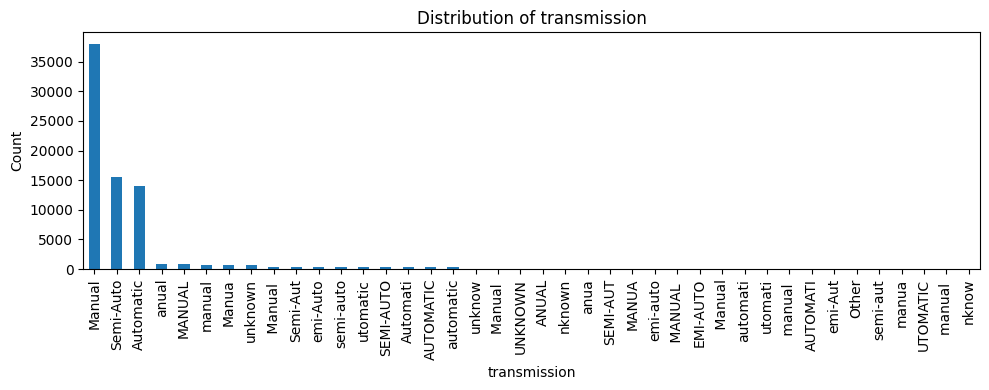

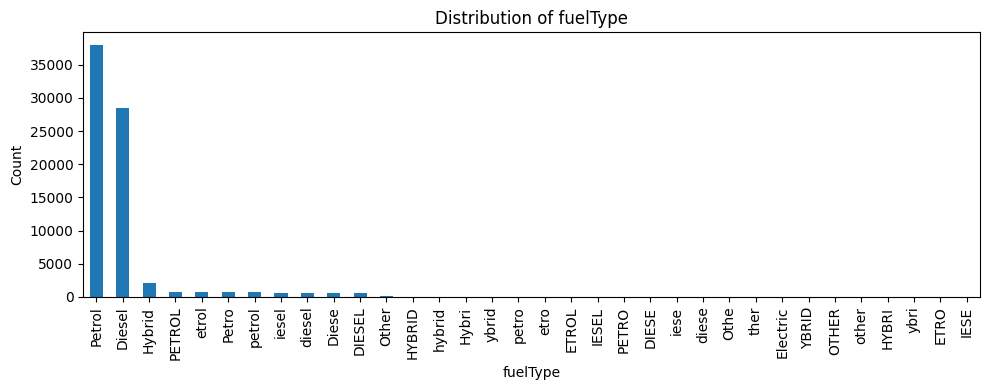

In [61]:
# class distribution
categorical_cols = ['transmission', 'fuelType']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

we will set the 'other' class as NaN since theres no other transmission type

we will later merge the 'hybrid' and 'electric' classes into 'other', since the number of samples in each of these classes is very small


In [62]:
df.columns

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

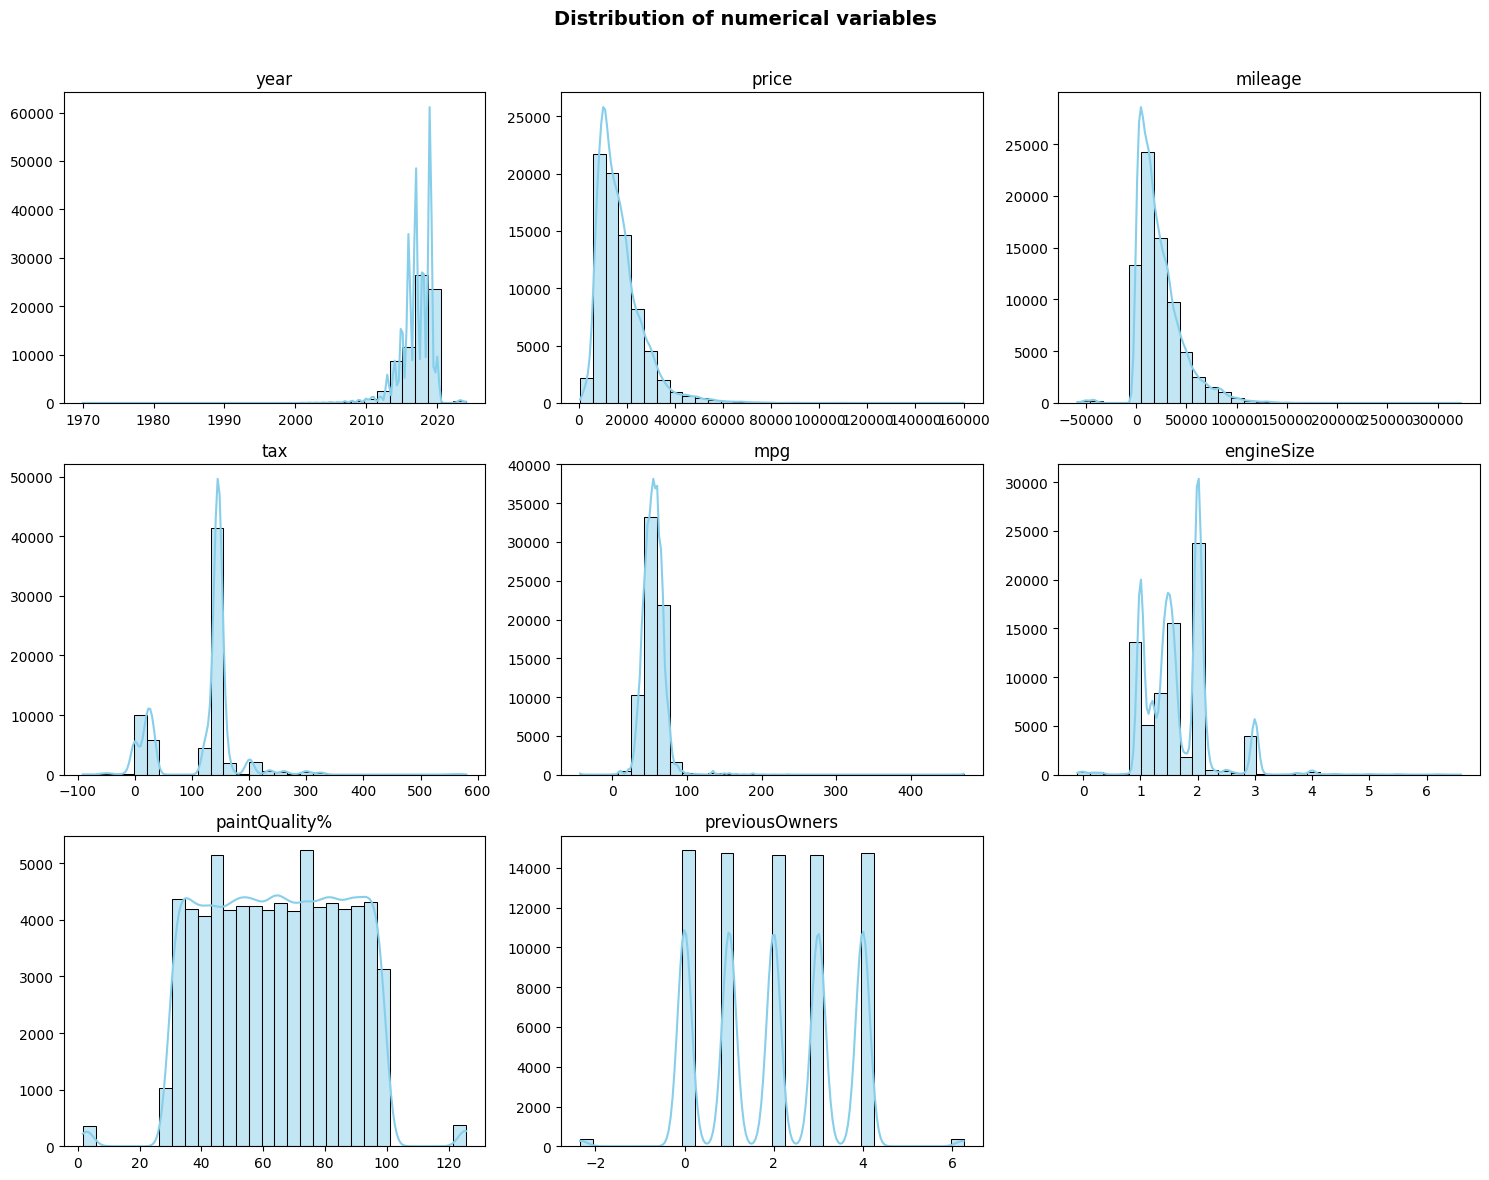

In [63]:
num_cols = [c for c in ['year','price','mileage','tax','mpg','engineSize','paintQuality%','previousOwners'] if c in df.columns]

n = len(num_cols)
ncols = 3  # number of graphics per row
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

#remove empty axes (if number of plots is not a multiple of ncols)--» otherwise there would be an empty graph in the third line
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of numerical variables", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

| Variable | Distribution | Key Range | Insights |
|----------|--------------|-----------|--------------|
| **Year** | Peaked around recent years | 2000-2024<br>*(Mostly 2016-2020)* | Modern cars dominate<br>Create "age" feature for depreciation |
| **Price** | Right-skewed | €500 - €160k<br>*(Mostly 10k-€20k€)* | Log transformation <br>High-end outliers present |
| **Mileage** | Right-skewed | 0 - 300k km<br>*(Mostly 0-40k km)* | Negative correlation with price expected<br>Logical after cleaning |
| **Tax** | Highly right-skewed | 0 - 600<br>*(Mostly 150-200)* | Validate low/zero values<br>Standard tax brackets dominate |
| **MPG** | Right-skewed | 0 - 450<br>*(Mostly 40-80 MPG)* | Extreme values likely errors<br>Log transformation could help |
| **Engine Size** | Multiple peaks | 0 - 6.5L<br>*(Peaks at 1.0, 1.6, 2.0L)* | Positive price correlation expected<br>Reflects vehicle class mix |
| **Paint Quality** | Nearly uniform | 0 - 120<br>*(Expected 0-100)* | Limited predictive power<br>Values >100 likely errors |
| **Previous Owners** | Discrete, multi-peaked | 0 - 6<br>*(Mostly 0-4)* | More owners may lower price<br>Effect likely moderate |

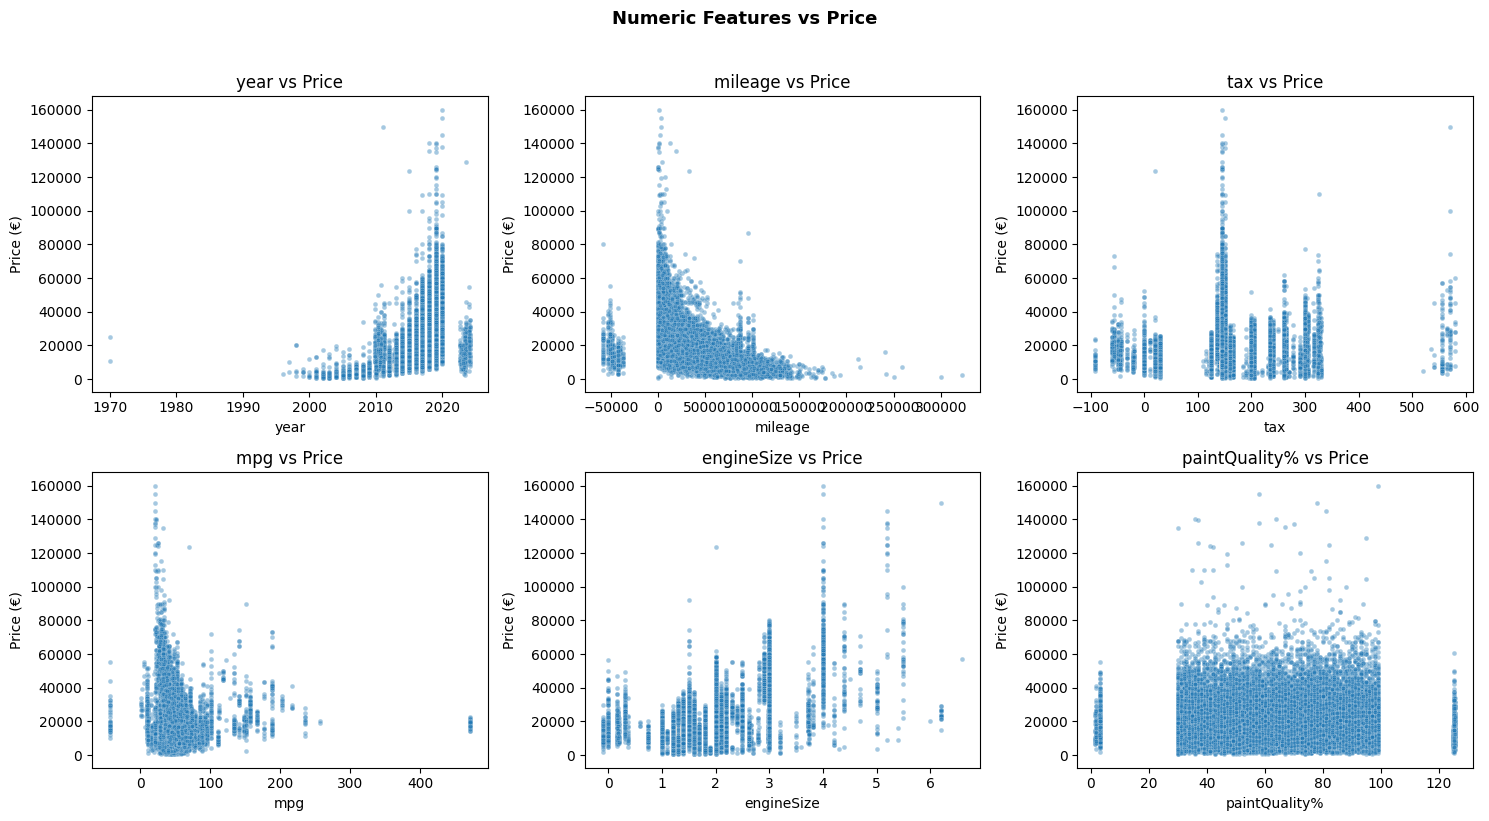

<Figure size 640x480 with 0 Axes>

In [64]:
# List of the numerical features
num_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'price']

# Scatterplots for all the numerical features except "previous_owners" because it doesn´t make sense to use scaterplott in this variable
others = [c for c in num_cols if c not in ['price', 'previousOwners']]
n, ncols = len(others), 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
axes = np.array(axes).reshape(-1)

for ax, col in zip(axes, others):
    sns.scatterplot(data=df, x=col, y='price', alpha=0.4, s=12, ax=ax)
    ax.set_title(f"{col} vs Price")
    ax.set_xlabel(col)
    ax.set_ylabel("Price (€)")

# Remove eixos vazios se existirem
for j in range(len(others), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Numeric Features vs Price", y=1.02, fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()
plt.tight_layout(); plt.show()

| Feature vs Price | Relationship | Key Pattern 
|------------------|--------------|-------------|
| **Year → Price** | Strong positive | Newer cars are more expensive; vertical banding by year feature |
| **Mileage → Price** | Strong negative | Non-linear: steep drop at low mileage, flattens later curve |
| **Engine Size → Price** | Positive but noisy | Vertical stripes at common sizes (1.0, 1.6, 2.0L) |
| **MPG → Price** | Weak/ambiguous | Hints of negative trend; efficient cars often cheaper |
| **Tax → Price** | No clear trend | Clusters in regulatory bands |
| **Paint Quality → Price** | No visible trend | Near-uniform vertical spread |

---

## **Data Preparation**

#### **Checking for constant value features**

In [65]:
# check for constant values features
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print(f'Constant features: {constant_features}')

Constant features: ['hasDamage']


Since hasDamage is a constant feature, we can safely remove it since theres no meaning if its keeped

In [66]:
df= df.drop(columns='hasDamage')

### **Modify Classes**

as we said earlier, we will set the 'other' value in transmission to NaN  
and also we will merge 'hybrid' and 'eletric' into 'other'

In [67]:
# set 'other' value in transmission to NaN
df['transmission'] = df['transmission'].replace('other', np.nan)

# merge 'hybrid' and 'eletric' into 'other'
df['transmission'] = df['transmission'].replace(['hybrid', 'electric'], 'other')

#### **Dealing with missing values**

First, lets check if we have any entries with every feature missing

In [68]:
# create a mask for rows where all columns except 'carID' and 'price' are NaN
mask = df.drop(columns=['carID', 'price']).isna().all(axis=1)
df_missing_rows = df[mask]

df_missing_rows.size

0

We don't have any row that is completely null

##### **Let's now check the percentages of missing values for each column**

In [69]:
# check the percentage of missing values for each column
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
df_missing_percent = pd.DataFrame({'column': missing_percent.index, 'missing_percent': missing_percent.values})
df_missing_percent

,column,missing_percent
0,mpg,10.432654
1,tax,10.403696
2,previousOwners,2.040198
3,paintQuality%,2.005976
4,transmission,2.003343
5,Brand,2.002027
6,model,1.996762
7,engineSize,1.995446
8,fuelType,1.988864
9,year,1.962539


We have some percentage of missing values but nothing too bad.

#### **Fill Missing Values in Numeric Features**

For the numeric features, we will use KNN imputation with the 5 nearest neighbors and just set the weights to 'uniform'.

In [70]:
num_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']

In [71]:
# store mean and std
means = df[num_cols].mean()
stds = df[num_cols].std()

# normalize
df_scaled = (df[num_cols] - means) / stds

# impute on scaled data
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed_scaled = pd.DataFrame(
    imputer.fit_transform(df_scaled),
    columns=num_cols,
    index=df.index
)

# inverse transform
df[num_cols] = df_imputed_scaled * stds + means

#### **Fill Missing Values in Categorical Features**

For the categorical variables we will use a Random Forest Classifier.  
We will train this RFC with the non null entries and use them to predict the null entries.  
We will do this sequentially in this order:  
Brand -> Model -> fuelType -> transmission

Since we believe thats the feature importance order.

In [72]:
def impute_categorical_rfc(df, target_col, ignore_cols=['carID', 'price'], n_estimators=200):
    """
    Impute missing values in a categorical column using a Random Forest Classifier.

    Parameters:
        df (pd.DataFrame): The dataframe containing missing values.
        target_col (str): Column to impute.
        ignore_cols (list): Columns to exclude from predictors.
        n_estimators (int): Number of trees for the Random Forest.

    Returns:
        pd.DataFrame: DataFrame with imputed column.
    """
    #split into rows with and without missing target
    df_notnull = df[df[target_col].notnull()]
    df_null = df[df[target_col].isnull()]

    #print(df_null.head())
    
    # predictors: list of all columns except target and ignored ones
    predictors = df.columns.drop([target_col] + ignore_cols)
    #print(predictors)
    
    #encode predictors, creates a column for every value of the target col and sets True/False for each row
    X_train = pd.get_dummies(df_notnull[predictors], drop_first=True)
    print(X_train)
    y_train = df_notnull[target_col]
    
    # train RFC
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    rfc.fit(X_train, y_train)
    
    # predict missing
    if not df_null.empty:
        X_null = pd.get_dummies(df_null[predictors], drop_first=True)
        # we need to reindex the columns of X_null so we have the same columns as X_train
        # if therese a column in X_train that is not in X_null, we fill it with 0
        # if theres a column in X_null that is not in X_train, it will random guess
        X_null = X_null.reindex(columns=X_train.columns, fill_value=0)
        
        df.loc[df[target_col].isnull(), target_col] = rfc.predict(X_null)
    
    print(f"Imputed '{target_col}' using Random Forest with {len(X_train)} training rows.")
    return df

In [73]:
cat_cols = ['Brand', 'model', 'fuelType', 'transmission']

for col in cat_cols:
    df = impute_categorical_rfc(df, col)


         year  mileage         tax        mpg  engineSize  paintQuality%  \
0      2016.0  28421.0  102.333851  11.417268         2.0           63.0   
1      2019.0   4589.0  145.000000  47.900000         1.5           50.0   
2      2019.0   3624.0  145.000000  40.900000         1.5           56.0   
3      2018.0   9102.0  145.000000  65.700000         1.0           50.0   
4      2019.0   1000.0  145.000000  42.800000         1.5           97.0   
...       ...      ...         ...        ...         ...            ...   
75968  2015.0  14480.0  125.000000  53.300000         2.0           78.0   
75969  2013.0  52134.0  200.000000  47.900000         2.0           38.0   
75970  2017.0  11304.0  145.000000  67.000000         1.0           57.0   
75971  2015.0  69072.0  125.000000  60.100000         2.0           74.0   
75972  2018.0  16709.0  145.000000  64.200000         1.1           38.0   

       previousOwners  model_ 1 SERIES  model_ 1 Serie  model_ 1 Series  ...  \
0      

In [ ]:
# save the filled dataframe to a csv file
#df.to_csv('../data/filled_cars.csv', index=False)

In [75]:
df = pd.read_csv('../data/filled_cars.csv')

---

### **Data Consistency**

**fixing brand and model typos**

In [76]:
# normalize strings: strip, lower
def clean_text(s):
    if pd.isna(s):
        return ''
    return str(s).strip().lower()

# normalize
df['brand_clean'] = df['Brand'].apply(clean_text)
df['model_clean'] = df['model'].apply(clean_text)
df_models['brand_clean'] = df_models['brand'].apply(clean_text)
df_models['model_clean'] = df_models['model'].apply(clean_text)
#print('Unique values for brand', df_models['brand_clean'].unique())


# --- fix models ---
def correct_model(row, df_models):
    model = row['model_clean']
    brand = row['brand_clean']
    
    if ((df_models['brand_clean'] == brand) & (df_models['model_clean'] == model)).any():
        return model
    
    if brand in df_models['brand_clean'].values:
        possible_models = df_models[df_models['brand_clean']==brand]['model_clean'].tolist()
        matched_model, score = safe_extract_one(model, possible_models, scorer=fuzz.ratio)
        return matched_model if score >= 40 else model
    
    possible_models = df_models['model_clean'].tolist()
    matched_model, score = safe_extract_one(model, possible_models, scorer=fuzz.ratio)
    return matched_model if score >= 40 else model

# --- fix brands ---
def correct_brand(row, df_models):
    brand = row['brand_clean']
    model = row['model_fixed']


    possible_brands = df_models[df_models['model_clean']==model]['brand_clean'].unique()
    #print("possible brands",possible_brands)
    if len(possible_brands) > 0:
        return max(set(possible_brands), key=list(possible_brands).count)

    
    if brand in df_models['brand_clean'].values:
        return brand
    if model == 'unknown':
        return brand
    
    
    all_brands = df_models['brand_clean'].unique()
    matched_brand, score = safe_extract_one(brand, all_brands, scorer=fuzz.token_sort_ratio)
    return matched_brand if score >= 40 else brand

# standard values in model
def standardize_model(s):
    if pd.isna(s):
        return ''
    s = str(s).lower().strip()
    s = s.replace('-', ' ')
    s = ' '.join(s.split())
    return s

def safe_extract_one(query, choices, scorer):
    result = process.extractOne(query, choices, scorer=scorer)
    if result is None:
        return None, 0
    # Algumas versões retornam 2 valores, outras 3
    if len(result) == 2:
        match, score = result
    elif len(result) == 3:
        match, score, _ = result
    else:
        match, score = result[0], result[1]
    return match, score



# standardize
df_models['model_clean'] = df_models['model'].apply(standardize_model)
df['model_clean'] = df['model'].apply(standardize_model)

# apply fix functions
df['model_fixed'] = df.apply(correct_model, axis=1, df_models=df_models)
df['brand_fixed'] = df.apply(correct_brand, axis=1, df_models=df_models)

# final resutl
df[['Brand', 'model', 'brand_fixed', 'model_fixed']]


# drop columns brand clean, model_clean, brand, model
df.drop(columns=['brand_clean', 'model_clean', 'Brand', 'model'], inplace= True)

df = df.rename(columns={'brand_fixed': 'brand', 'model_fixed': 'model'})

**fixing fuel type and transmission typos**

In [77]:
# Canonical values of fuel_type and transmission
canonical_fuels = ['petrol', 'diesel', 'hybrid', 'electric', 'other']
canonical_transmissions = ['manual', 'automatic', 'semi-auto', 'other']

# Normalize column strings
df['fuel_type_clean'] = (df['fuelType']
    .astype(str)
    .str.strip()
    .str.lower()
)
df['transmission_clean'] = (df['transmission']
    .astype(str)
    .str.strip()
    .str.lower()
)

# Correcting typos in the columns
def fuzzy_match_column(series, canonical_values, score_cutoff=85, default='other'):
    """
    Fuzzy-matches each value in a pandas Series to a list of canonical values.
    Example:
        fuzzy_match_column(df['fuel_type_clean'], ['petrol', 'diesel', 'electric'])
    """
    def match_one(value):


        # exact match
        if value in canonical_values:
            return value

        # fuzzy match
        match = process.extractOne(value, canonical_values, scorer=fuzz.token_sort_ratio)
        if match is None:
            return "unknown"

        best_choice, score, _ = match
        return best_choice if score >= score_cutoff else default

    return series.apply(match_one)


# apply fix functions
df['fuel_type_fixed'] = fuzzy_match_column(df['fuel_type_clean'], canonical_fuels)
df['transmission_fixed'] = fuzzy_match_column(df['transmission_clean'], canonical_transmissions)


# final result
df[['fuelType', 'fuel_type_clean', 'fuel_type_fixed',
    'transmission', 'transmission_clean', 'transmission_fixed']].head(10)


# drop and rename
df.drop(columns= ['fuelType', 'fuel_type_clean', 'transmission','transmission_clean'], inplace= True)

df = df.rename(columns={'fuel_type_fixed': 'fuel_type', 'transmission_fixed': 'transmission'})

### **Duplicates**

First thing first, lets check if we have duplicate ids

In [78]:
df['carID'][df['carID'].duplicated()]

Series([], Name: carID, dtype: int64)

AS we see, theres no duplicated ids

In [79]:
df[df.duplicated(keep=False)]

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,model,brand,fuel_type,transmission


No duplicated rows as well

### **Fix Column Names**

In [80]:
# change order of columns
df = df[['carID','brand', 'model', 'year', 'transmission', 'mileage', 'fuel_type', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'price']]

In [81]:
# rename column cardid to car_id and brand fixed to brand
df = df.rename(columns={'carID': 'car_id', 'engineSize': 'engine_size', 'paintQuality%': 'paint_quality', 'previousOwners': 'previous_owners'})

In [82]:
df.head()

,car_id,brand,model,year,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,price
0,69512,volkswagen,golf,2016.0,semi-auto,28421.0,petrol,102.333851,11.417268,2.0,63.0,4.000000,22290
1,53000,toyota,yaris,2019.0,manual,4589.0,petrol,145.000000,47.900000,1.5,50.0,1.000000,13790
2,6366,audi,q3,2019.0,semi-auto,3624.0,petrol,145.000000,40.900000,1.5,56.0,4.000000,24990
3,29021,ford,fiesta,2018.0,manual,9102.0,petrol,145.000000,65.700000,1.0,50.0,-2.340306,12500
4,10062,bmw,2 series,2019.0,manual,1000.0,petrol,145.000000,42.800000,1.5,97.0,3.000000,22995


---

## **Outliers**

---

## **Feature Engineering**

we have an idea to extract the horsepower and the number of gears from the external dataset. we will do that in the final delivery if so  
https://sesjournal.org/index.php/1/article/view/104/724